# Classifier 

### Data description:

Multiple, labelled samples of pen tip trajectories recorded whilst writing individual characters. All samples are from the same writer, for the purposes of primitive extraction. Only characters with a single pen-down segment were considered.

Each character sample is a 3-dimensional pen tip velocity trajectory. This is contained in matrix format, with 3 rows and T columns where T is the length of the character sample.

The characters here were used for a PhD study on primitive extraction using HMM based models. The data consists of 2858 character samples, contained in the cell array 'mixout'. The struct variable 'consts' contains a field consts.charlabels which provides ennummerated labels for the characters. consts.key provides the key for each label. The data was captured using a WACOM tablet. 3 Dimensions were kept - x, y, and pen tip force. The data has been numerically differentiated and Gaussian smoothed, with a sigma value of 2. Data was captured at 200Hz. The data was normalised with consts.datanorm. Only characters with a single 'PEN-DOWN' segment were considered. Character segmentation was performed using a pen tip force cut-off point. The characters have also been shifted so that their velocity profiles best match the mean of the set.

## Download database

Run the cell below to collect the archives in your folder.

Safe cell that will create a folder `../trajectory_dataset` (), download and overwrite the files in this folder.

In [1]:
import os 
import requests

if not os.path.exists("../trajectory_dataset"):
    os.mkdir("../trajectory_dataset")
    r = requests.get("https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat")
    open('../trajectory_dataset/mixoutALL_shifted.mat', 'wb').write(r.content)
    r = requests.get(" https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names")

    open('../trajectory_dataset/trajectories.names', 'wb').write(r.content)
# ! wget -O ../trajectory_dataset/mixoutALL_shifted.mat https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/mixoutALL_shifted.mat
# ! wget -O ../trajectory_dataset/trajectories.names https://archive.ics.uci.edu/ml/machine-learning-databases/character-trajectories/trajectories.names

## Interacting with data

In [2]:
from scipy.io import loadmat
import numpy as np

# load data in a python dictionnary
mat = loadmat('../trajectory_dataset/mixoutALL_shifted.mat')

mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'consts', 'mixout'])

In [3]:
# Information about the dataset

n_samples = mat["mixout"][0].__len__()

print(f"Number of samples:\t {n_samples}")


# Loading samples labels
keys = mat["consts"][0,0][4]
keys = [key - 1 for key in keys[0]]

labels = mat["consts"][0,0][3]
labels = np.array([label[0] for label in labels[0]])

samples_label = labels[[keys]]

label_unique, label_count = np.unique(samples_label, return_counts=True)

print()
print("Data distribution:")
print(f"{len(label_unique)} different class")
line_u = "_______" + str.join("_", ["___" for _ in label_count]) + "_"
print(line_u)
char = "|CHAR  | " + str.join(" | ", label_unique) + " |"
print(char)
line_d = "|______|" + str.join("|", ["___" for _ in label_count]) + "|"
print(line_d)
count = "|COUNT |" + str.join("|", [str(c) for c in label_count]) + "|"
print(count)
print(line_d)


samples = mat["mixout"][0]

f_s = 200 #Hz sampling at 200Hz

print(f"\n\nN_features: \t\t{samples[0].shape[0]} ---> \t(v_x, v_y, pen_tip_force)")
print(f"Sampling frequency: \t{f_s} Hz")


Number of samples:	 2858

Data distribution:
20 different class
_______________________________________________________________________________________
|CHAR  | a | b | c | d | e | g | h | l | m | n | o | p | q | r | s | u | v | w | y | z |
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|
|COUNT |171|141|142|157|186|138|127|174|125|130|141|131|124|119|133|131|155|125|137|171|
|______|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|___|


N_features: 		3 ---> 	(v_x, v_y, pen_tip_force)
Sampling frequency: 	200 Hz


<ipython-input-3-d784a7ea64b0>:15: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  samples_label = labels[[keys]]


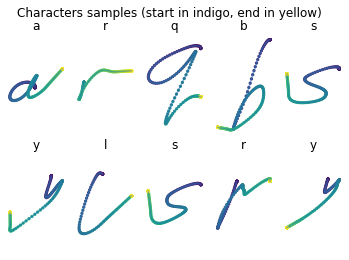

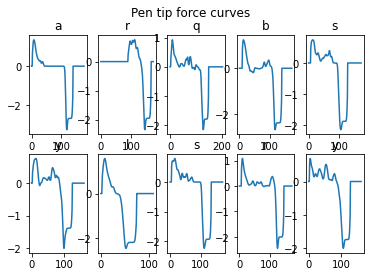

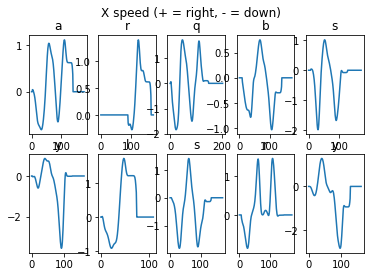

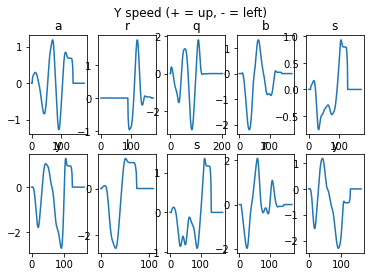

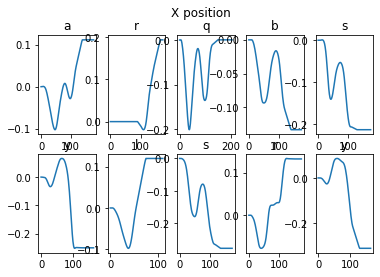

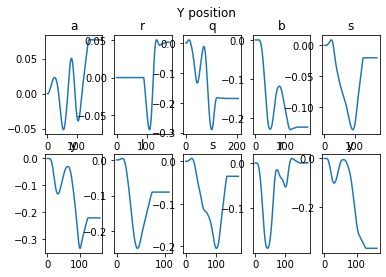

In [4]:
import matplotlib.pyplot as plt

rdm_sample_idx = np.random.randint(0, len(samples), 10)

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.scatter(x[:], y[:], c=np.arange(len(x)), s=5)

    # To modulate the linewidth depending on the pen tip force 
    # plt.scatter(x[1:], y[1:], c=np.arange(len(x[1:])), s=2*np.abs(pen_tip_f))
    
    plt.plot(x, y, alpha=0.5)
    
    plt.title(samples_label[i_sample])

    plt.axis('equal')
    plt.axis('off')
    #plt.colorbar()

plt.suptitle("Characters samples (start in indigo, end in yellow)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    pen_tip_f = exsample[2]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(pen_tip_f)), pen_tip_f)
    plt.title(samples_label[i_sample])

plt.suptitle("Pen tip force curves")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("X speed (+ = right, - = down)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    y_speed = exsample[1]

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y_speed)), y_speed)
    plt.title(samples_label[i_sample])

plt.suptitle("Y speed (+ = up, - = left)")
plt.show()

for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(x)), x)
    plt.title(samples_label[i_sample])

plt.suptitle("X position")
plt.show()


for i, i_sample in enumerate(rdm_sample_idx):

    exsample = samples[i_sample]

    x_speed = exsample[0]
    y_speed = exsample[1]
    pen_tip_f = exsample[2]
    

    # Conversion to trajectory beggining at point (0,0)
    x = [0]
    y = [0]

    for x_v, y_v in zip(x_speed, y_speed):
        x.append(x[-1] + x_v/f_s)
        y.append(y[-1] + y_v/f_s)

    plt.subplot(2, 5, i+1)
    plt.plot(np.arange(len(y)), y)
    plt.title(samples_label[i_sample])

plt.suptitle("Y position")
plt.show()

In [5]:
x_speeds = []
y_speeds = []
pen_tip_forces = []
max_len = 0
min_len = 1000

for sample in samples:
    x_speeds.append(sample[0])
    y_speeds.append(sample[1])
    pen_tip_forces.append(sample[2])
    
    if len(sample[0]) > max_len:
        max_len = len(sample[0])
    
    if len(sample[0]) < min_len:
        min_len = len(sample[0])


In [6]:
print(f"Longueur minimale : {min_len}")
print(f"Longueur maximale : {max_len}")

Longueur minimale : 109
Longueur maximale : 205


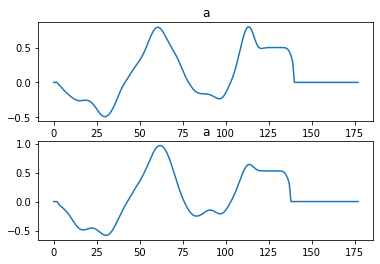

In [7]:
for i, x_speed in enumerate(x_speeds[:2]):

    plt.subplot(2, 1, i+1)
    plt.plot(np.arange(len(x_speed)), x_speed)
    plt.title(samples_label[i])

In [8]:
samples_label.shape


(2858,)

In [9]:
from sklearn.model_selection import train_test_split

train_idx, test_idx = train_test_split(np.arange(len(x_speeds)), test_size=0.4, stratify=samples_label)

x_train = [x_speeds[i] for i in train_idx if samples_label[i] ]
x_test = [x_speeds[i] for i in test_idx if samples_label[i] ]

y_train = [y_speeds[i] for i in train_idx if samples_label[i] ]
y_test = [y_speeds[i] for i in test_idx if samples_label[i] ]

samples_label_train = [samples_label[i] for i in train_idx if samples_label[i] ]
samples_label_test = [samples_label[i] for i in test_idx if samples_label[i]]

## TWI-kSVD on char-traj data

In [180]:
from twi_ksvd.dic_reader import LetterClassifier

clf = LetterClassifier()
clf.load_data("../results")
print(clf.letters)
clf.select_letters(['a','b',"d",'m',"h"])
idx = 152
x_signal = x_test[idx]
y_signal= y_test[idx]
print(samples_label_test[idx])


['a', 'b', 'c', 'd', 'e', 'g', 'h', 'l', 'm', 'n', 'o', 'p']
d


# Test Module

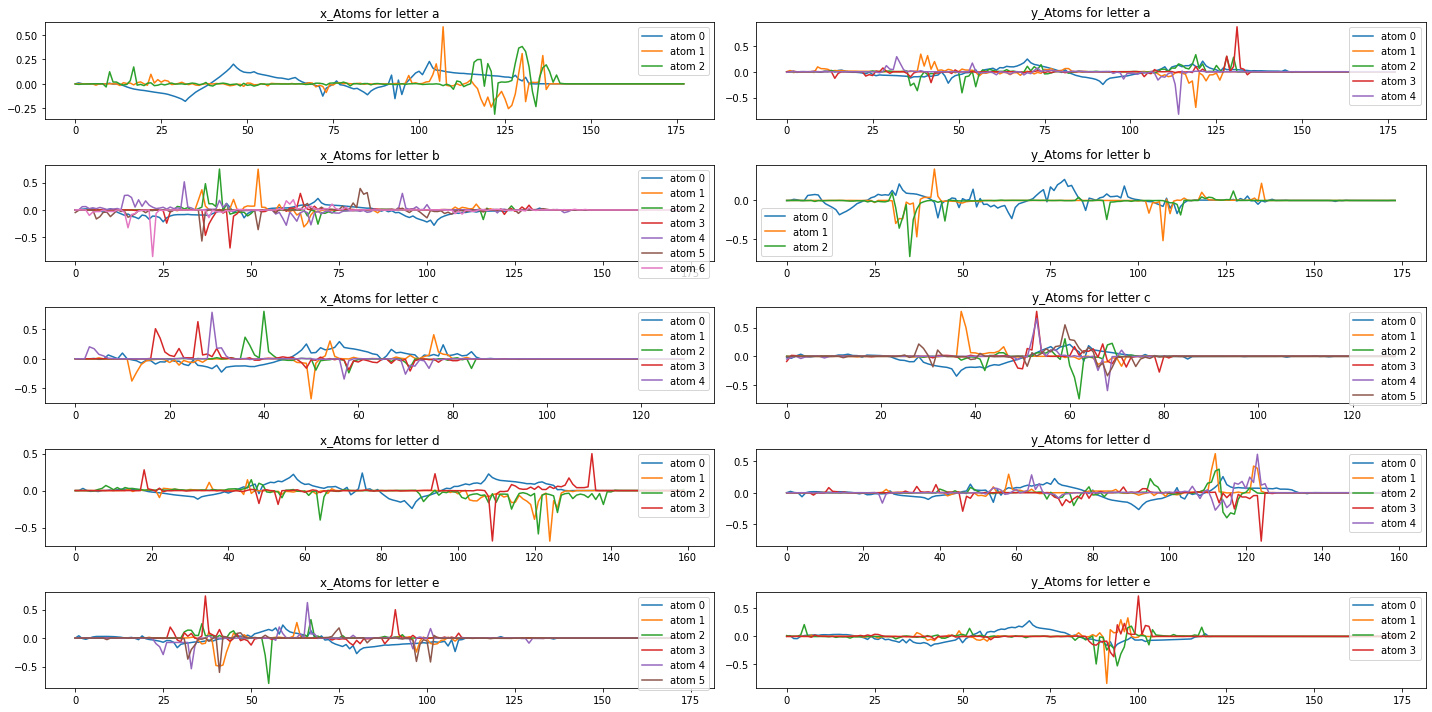

In [183]:
clf.plot_atom(clf.letters[:5])

In [182]:
alphas_x, deltas_x, alphas_y, deltas_y = clf.fit(x_signal,y_signal, tau = 2, r_window = 20)

No handles with labels found to put in legend.


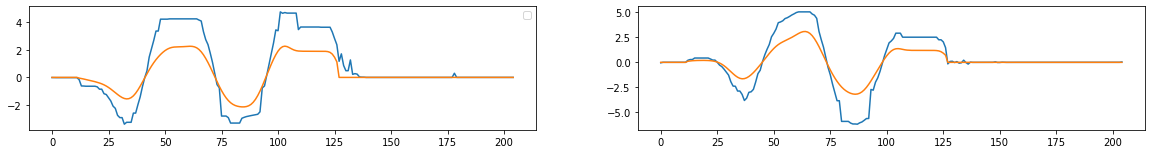

Text(0.5, 1.0, 'Reconstructed signal :')

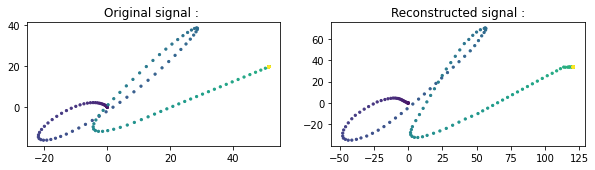

In [184]:
reconstructed_x_signal = clf.reconstruct_signal(alphas_x, deltas_x, clf.concatenated_x_dico)
reconstructed_y_signal = clf.reconstruct_signal(alphas_y, deltas_y, clf.concatenated_y_dico)

plt.figure(figsize = (20,5))
plt.subplot(223)
plt.plot(reconstructed_x_signal)
plt.plot(x_signal)
plt.legend()
plt.subplot(224)
plt.plot(reconstructed_y_signal)
plt.plot(y_signal)
plt.show()
plt.figure(figsize = (10,5))
plt.subplot(2, 2, 1)
plt.scatter(x_signal.cumsum(), y_signal.cumsum(), c=np.arange(len(x_signal)), s=5)
plt.title('Original signal : ')
# plt.axis('off')

plt.subplot(2, 2, 2)
plt.scatter(reconstructed_x_signal.cumsum(), reconstructed_y_signal.cumsum(), c=np.arange(len(reconstructed_x_signal)), s=5)
plt.title('Reconstructed signal :')
# plt.axis('off')

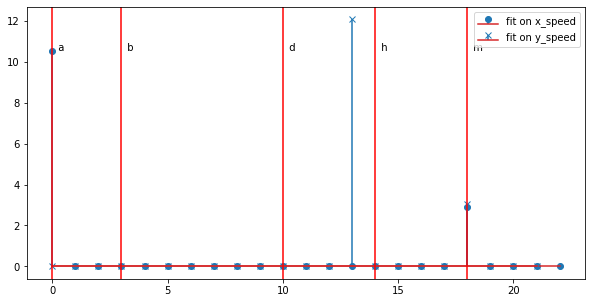

In [185]:
plt.figure(figsize = (10,5))
plt.stem(alphas_x, label = "fit on x_speed")
plt.stem(alphas_y, markerfmt = "x", label = "fit on y_speed")
curr = clf.map_letter_to_atoms_x_dico[0]
plt.axvline(0, color='r')
plt.text(0,np.max(alphas_x),'  ' + curr)
for i, st in enumerate(clf.map_letter_to_atoms_x_dico):
    if curr != st:
        plt.axvline(i, color='r')
        plt.text(i,max(alphas_x),'  ' + st)
        curr = st


plt.legend()
plt.show()

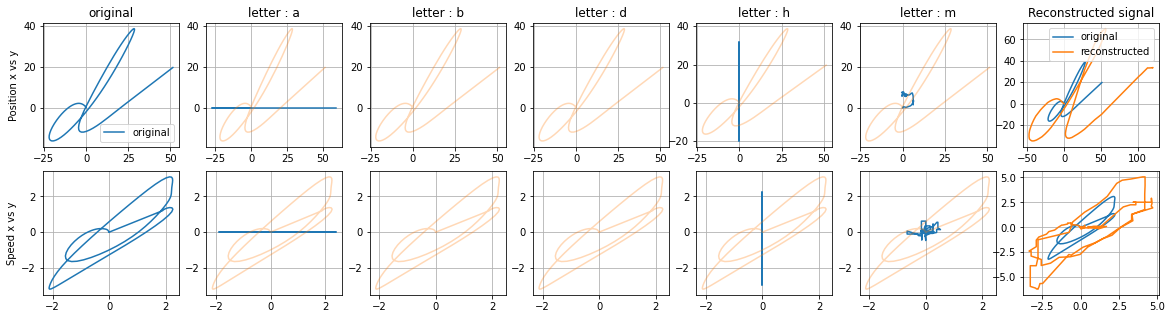

In [200]:
plt.figure(figsize = (20,5))
plt.subplot(2,len(clf.selected_letters)+2,1)
plt.ylabel("Position x vs y")
plt.plot(x_signal.cumsum(),y_signal.cumsum(),label = "original")
plt.legend()
plt.grid()
plt.title("original")
plt.subplot(2,6,7)
plt.plot(x_signal,y_signal,label = "original")
plt.legend()
plt.grid()
I = 0
J = 0 
for j,i in enumerate(clf.generator_reconstructed_signal_per_letter(alphas_x,deltas_x,alphas_y,deltas_y)): 
  plt.subplot(2,len(clf.selected_letters)+2,j+2)
  plt.plot(i[1].cumsum(),i[2].cumsum())
  plt.plot(x_signal.cumsum(),y_signal.cumsum(),label = "original", alpha = 0.3)
  plt.grid()
  plt.title("letter : " +i[0])

  plt.subplot(2,len(clf.selected_letters)+2,j+2+len(clf.selected_letters)+2)
  plt.plot(i[1],i[2])
  I += i[1]
  J+= i[2]
  plt.plot(x_signal,y_signal,label = "original", alpha = 0.3)
  plt.grid()
  # plt.plot(x_signal.cumsum(),y_signal.cumsum())
plt.subplot(2,len(clf.selected_letters)+2,j+3)
plt.plot(x_signal.cumsum(),y_signal.cumsum(),label = "original")
plt.plot(reconstructed_x_signal.cumsum(),reconstructed_y_signal.cumsum(), label = "reconstructed")
plt.grid()

plt.title("Reconstructed signal")
plt.legend()

plt.subplot(2,len(clf.selected_letters)+2,j+3+len(clf.selected_letters)+2)
plt.plot(x_signal,y_signal,label = "original")
plt.plot(reconstructed_x_signal,reconstructed_y_signal, label = "reconstructed")
plt.grid()
# plt.tight_layout()
plt.subplot(2,7,8)
plt.ylabel("Speed x vs y")
plt.plot(x_signal,y_signal,label = "original")
plt.grid()
plt.show()


In [188]:
clf.classify(x_signal,y_signal, tau=2, r_window=20)

letter : a , res_x : 3.481260651041677, res_y : 17.846962376137526, res_xy : 21.328223027179202, res : 21.328223027179202
letter : b , res_x : 16.81989722993119, res_y : 17.846962376137526, res_xy : 34.66685960606871, res : 34.66685960606871
letter : d , res_x : 16.81989722993119, res_y : 17.846962376137526, res_xy : 34.66685960606871, res : 34.66685960606871
letter : h , res_x : 16.81989722993119, res_y : 2.8860338171667945, res_xy : 19.705931047097984, res : 19.705931047097984
letter : m , res_x : 16.755326440907364, res_y : 17.624901404289446, res_xy : 34.38022784519681, res : 34.38022784519681


{'a': (3.481260651041677,
  17.846962376137526,
  21.328223027179202,
  21.328223027179202),
 'b': (16.81989722993119,
  17.846962376137526,
  34.66685960606871,
  34.66685960606871),
 'd': (16.81989722993119,
  17.846962376137526,
  34.66685960606871,
  34.66685960606871),
 'h': (16.81989722993119,
  2.8860338171667945,
  19.705931047097984,
  19.705931047097984),
 'm': (16.755326440907364,
  17.624901404289446,
  34.38022784519681,
  34.38022784519681)}

In [17]:
# import pandas as pd 
# from tqdm import tqdm

# Lx = []
# Ly = []
# Lxy=[]
# Lxxyy = []
# for i in tqdm (range(len(x_test))):
#   res = clf.classify(x_test[i][::2],y_test[i][::2], tau=2, r_window=20)
#   d = pd.DataFrame(res)
#   Lx.append(d.columns[d.loc[0].argmin()])
#   Ly.append(d.columns[d.loc[1].argmin()])
#   Lxy.append(d.columns[d.loc[2].argmin()])
#   Lxxyy.append(d.columns[d.loc[3].argmin()])

# kSVD

In [18]:
max(map(lambda x : len(x), x_test))
min(map(lambda x : len(x), x_test))

109

In [19]:
for i in range(len(x_train)):
  x_train[i] = np.pad(x_train[i],(0,205-len(x_train[i])), 'constant')

for i in range(len(x_test)):
  x_test[i] = np.pad(x_test[i],(0,205-len(x_test[i])), 'constant')

for i in range(len(x_train)):
  y_train[i] = np.pad(y_train[i],(0,205-len(y_train[i])), 'constant')

for i in range(len(x_test)):
  y_test[i] = np.pad(y_test[i],(0,205-len(y_test[i])), 'constant')

In [ ]:
from twi_ksvd.ksvd import kSVD
from pathlib import Path

for letter in np.unique(samples_label):
    x_train_a = [np.pad(x_speeds[i],(0,205-len(x_speeds[i])), 'constant') for i in train_idx if samples_label[i] == letter]
    y_train_a = [np.pad(y_speeds[i],(0,205-len(y_speeds[i])), 'constant') for i in train_idx if samples_label[i] == letter]

    model = kSVD(5)

    choice_idx = np.random.choice(np.arange(len(x_train_a)), 5)
    D = np.vstack([x_train_a[i] for i in choice_idx])
    A,D = model.fit(np.array(x_train_a).T,D.T,3)
    os.makedirs(f"../results_ksvd/{letter}/", exist_ok=True)
    f = Path(f"../results_ksvd/{letter}/dict_x.npy")
    np.save(f,D)

    model = kSVD(5)

    choice_idx = np.random.choice(np.arange(len(y_train_a)), 5)
    D = np.vstack([y_train_a[i] for i in choice_idx])
    A,D = model.fit(np.array(y_train_a).T,D.T,3)
    os.makedirs(f"../results_ksvd/{letter}/", exist_ok=True)
    f = Path(f"../results_ksvd/{letter}/dict_y.npy")
    np.save(f,D)


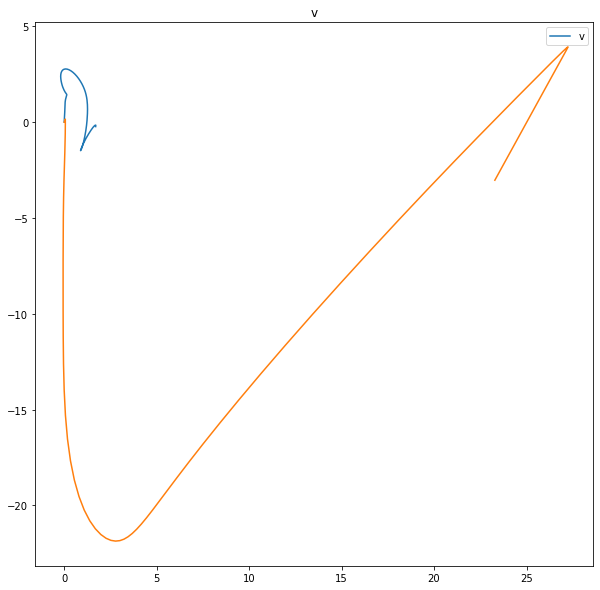

In [58]:
from twi_ksvd.omp import OMP
idx = 8
x_signal = x_test[idx]
y_signal = y_test[idx]
plt.figure(figsize = (10,10))

for letter in np.unique(samples_label):
    if letter != samples_label_test[idx]:
        continue


    D_x = np.load(f"../results_ksvd/{letter}/dict_x.npy")
    # print(D.shape)
    alpha_x= OMP(x_signal,D,2)

    #load dict
    D_y = np.load(f"../results_ksvd/{letter}/dict_y.npy")
    # print(D.shape)
    alpha_y= OMP(y_signal,D,2)
    plt.plot((D_x@alpha_x).cumsum(),(D_y@alpha_y).cumsum(), alpha = 1, label = letter)
plt.plot(x_signal.cumsum(),y_signal.cumsum())
plt.title(samples_label_test[idx])
plt.legend()

In [99]:
from twi_ksvd.omp import OMP
import pandas as pd 
L = []
for idx in range(len(x_test)):
    x_signal = x_test[idx]
    y_signal = y_test[idx]
    # plt.figure(figsize = (10,10))

    res = {}
    for letter in np.unique(samples_label):
        # if letter != samples_label_test[idx]:
        #     continue


        D_x = np.load(f"../results_ksvd/{letter}/dict_x.npy")
        # print(D.shape)
        alpha_x= OMP(x_signal,D,3)

        #load dict
        D_y = np.load(f"../results_ksvd/{letter}/dict_y.npy")
        # print(D.shape)
        alpha_y= OMP(y_signal,D,3)

        res[letter] = (np.linalg.norm((D_x@alpha_x)-x_signal),np.linalg.norm((D_y@alpha_y)-y_signal),np.linalg.norm(np.vstack(((D_x@alpha_x)-x_signal,(D_y@alpha_y)-y_signal)), axis = 1).sum())
        # plt.subplot(2,1,1)
        # plt.plot((D_x@alpha_x), alpha = 1, label = letter)
        # plt.subplot(2,1,2)
        # plt.plot((D_y@alpha_y), alpha = 1, label = letter)

    df = pd.DataFrame(res).T
    L.append((samples_label_test[idx], df.index[df[0].argmin()],df.index[df[1].argmin()],df.index[df[2].argmin()]))
    # print(samples_label_test[idx], df.index[df[0].argmin()],df.index[df[1].argmin()],df.index[df[2].argmin()])


In [100]:
df = pd.DataFrame(L)
df.head()

,0,1,2,3
0,r,r,h,r
1,l,p,l,l
2,b,p,l,z
3,l,p,v,v
4,m,g,z,z


In [101]:
from sklearn.metrics import precision_score, recall_score, f1_score
print("precision",precision_score(df[0], df[1], average='macro'), precision_score(df[0], df[2], average='macro'), precision_score(df[0], df[3], average='macro'))
print("recall",recall_score(df[0], df[1], average='macro'), recall_score(df[0], df[2], average='macro'), recall_score(df[0], df[3], average='macro'))
print("f1",f1_score(df[0], df[1], average='macro'), f1_score(df[0], df[2], average='macro'), f1_score(df[0], df[3], average='macro'))

precision 0.13440543028143462 0.11249863284978914 0.1113086033106673
recall 0.11873984150381715 0.1218138270991171 0.12180646375597286
f1 0.11097960263834908 0.08066157053396572 0.10553577670025997


c:\Users\paple\anaconda3\envs\sophia\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


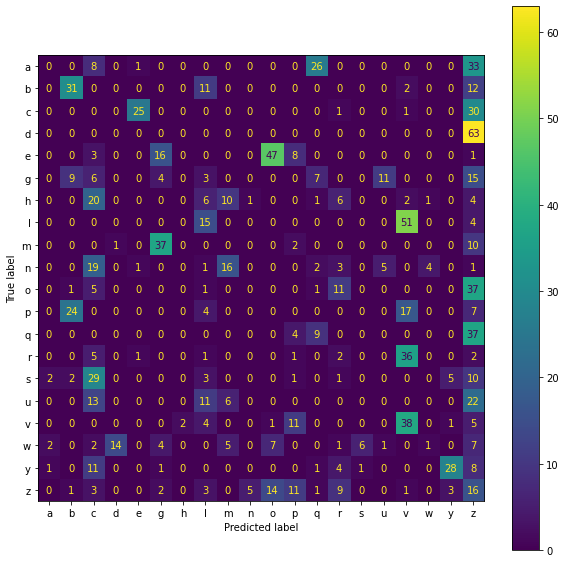

In [102]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(1,1,figsize = (10,10))
cm = confusion_matrix(df[0], df[3], labels = np.unique(samples_label))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(samples_label))
disp.plot(ax = ax)
plt.show()

 # Compare fitting between kSVD and TWI kSVD

In [150]:
idx = 12
x_test[idx].shape
letter = samples_label_test[idx]
letter

'h'

In [152]:
from twi_ksvd.dic_reader import LetterClassifier

clf = LetterClassifier()
clf.load_data("../results")
print(clf.letters)
clf.select_letters(['a','b','m',"h","g","p"])
x_signal = x_test[idx]
y_signal= y_test[idx]

alphas_x, deltas_x, alphas_y, deltas_y =clf.fit(x_signal,y_signal,3,20)

reconstructed_x_signal = clf.reconstruct_signal(alphas_x, deltas_x, clf.concatenated_x_dico)
reconstructed_y_signal = clf.reconstruct_signal(alphas_y, deltas_y, clf.concatenated_y_dico)


D_x = np.load(f"../results_ksvd/{letter}/dict_x.npy")
# print(D.shape)
alpha_x= OMP(x_signal,D,3)

#load dict
D_y = np.load(f"../results_ksvd/{letter}/dict_y.npy")
# print(D.shape)
alpha_y= OMP(y_signal,D,3)


['a', 'b', 'c', 'd', 'e', 'g', 'h', 'l', 'm', 'n', 'o', 'p']


Text(0.5, 1.0, 'Reconstruction of y axis')

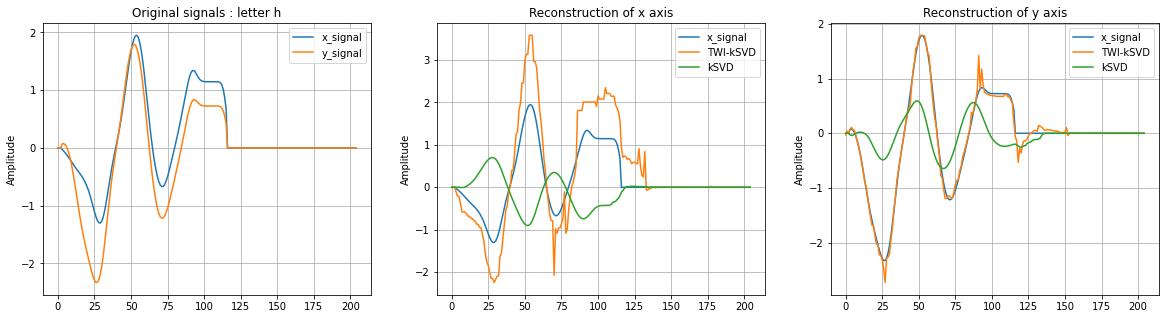

In [153]:
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
plt.plot(x_signal, label = "x_signal")
plt.plot(y_signal, label = "y_signal")
plt.legend()
plt.title(f"Original signals : letter {letter}")
plt.grid()
plt.ylabel("Amplitude")
plt.subplot(1,3,2)
plt.plot(x_signal, label = "x_signal")
plt.plot(reconstructed_x_signal, label = "TWI-kSVD")
plt.plot(D_x@alpha_x, label = "kSVD")
plt.title("Reconstruction of x axis")
plt.legend()
plt.grid()
plt.ylabel("Amplitude")
plt.subplot(1,3,3)
plt.plot(y_signal, label = "x_signal")
plt.plot(reconstructed_y_signal, label = "TWI-kSVD")
plt.plot(D_y@alpha_y, label = "kSVD")
plt.legend()
plt.grid()
plt.ylabel("Amplitude")
plt.title("Reconstruction of y axis")